# Homography Matrix Application


## Abstract

When an image is taken by a camera, there is inherent projective distortion, making rectangular objects distorted. However, this distortion can be reversed if the linear mapping from projective to affine. This Jupyter notebook is an outline of the derivation, implementiation, and testing of a 3x3 homography matrix that linearly maps two camera perspectives.


## Derivation of the Homography


### Projective Distortion

Assuming a linear mapping between points in the first image plane $X = (x, y, z)$ to a second image plane with points $X' = (x', y', z')$, the transformation can be written as a square matrix $H$. Note that $z=1$ since the perspective only account for 2D images.


$$
Hp = p' \implies
\begin{bmatrix}
h_{11} & h_{12} & h_{13} \\
h_{21} & h_{22} & h_{23} \\
h_{31} & h_{32} & h_{33} \\
\end{bmatrix}
\begin{bmatrix}
x \\ y \\ 1 \\
\end{bmatrix}
=
\begin{bmatrix}
x' \\ y' \\ 1 \\
\end{bmatrix}
$$


### Homogenous Solution for Elements of $H$


As a system of linear equations, the first and second rows can be divided by the last row to create a homogenous system that accounts for all the elements of $H$.


$$
\begin{align*}
&
\begin{cases}
x' &= h_{11} x + h_{12} y + h_{13} \\
y' &= h_{21} x + h_{22} y + h_{23} \\
1 &= h_{31} x + h_{32} y + h_{33} \\
\end{cases}
\\ &
\begin{cases}
x' &= \dfrac
{ h_{11} x + h_{12} y + h_{13} }
{ h_{31} x + h_{32} y + h_{33} } \\
y' &= \dfrac
{ h_{21} x + h_{22} y + h_{23} }
{ h_{31} x + h_{32} y + h_{33} } \\
\end{cases}
\\ &
\begin{cases}
0 &=
{ h_{11} x + h_{12} y + h_{13} }
{ -h_{31} x x' - h_{32} y x' - h_{33} x' } \\
0 &=
{ h_{21} x + h_{22} y + h_{23} }
{ -h_{31} x y' - h_{32} y y' - h_{33} y' } \\
\end{cases}
\end{align*}
$$


Since the variables $x, y, x', y'$ refer to coordinates in the their respective images, the homogenous equation must be expanded to the following form. This leads to $2N$ rows where $N$ is the number of points. Solving for $h$ in the homogenous solution below solves for the coefficients of the unknown $H$.


$$
\begin{bmatrix}
x_{1} & y_{1} & 1 & 0&0&0 & -x_{1}x_{1}' & -y_{1}x_{1}' & -x_{1}' \\
0&0&0 & x_{1} & y_{1} & 1 & -x_{1}y_{1}' & -y_{1}y_{1}' & -y_{1}' \\
x_{2} & y_{2} & 1 & 0&0&0 & -x_{2}x_{2}' & -y_{2}x_{2}' & -x_{2}' \\
0&0&0 & x_{2} & y_{2} & 1 & -x_{2}y_{2}' & -y_{2}y_{2}' & -y_{2}' \\
x_{3} & y_{3} & 1 & 0&0&0 & -x_{3}x_{3}' & -y_{3}x_{3}' & -x_{3}' \\
0&0&0 & x_{3} & y_{3} & 1 & -x_{3}y_{3}' & -y_{3}y_{3}' & -y_{3}' \\
x_{4} & y_{4} & 1 & 0&0&0 & -x_{4}x_{4}' & -y_{4}x_{4}' & -x_{4}' \\
0&0&0 & x_{4} & y_{4} & 1 & -x_{4}y_{4}' & -y_{4}y_{4}' & -y_{4}' \\
\end{bmatrix}
\begin{bmatrix}
 h_{11} \\ h_{12} \\ h_{13} \\
 h_{21} \\ h_{22} \\ h_{23} \\
 h_{31} \\ h_{32} \\ h_{33} \\
\end{bmatrix}
=
\begin{bmatrix}
 0 \\ 0 \\ 0 \\
 0 \\ 0 \\ 0 \\
 0 \\ 0 \\ 0 \\
\end{bmatrix}
\implies
Ah = 0
$$


### Least Square Estimation


Using least square estimation, the homogenous system must minimize the following term.


$$
\begin{align*}
&\min_{h} \dfrac{1}{2} \lVert Ah - 0 \rVert^2_2 \\
&\min_{h} \dfrac{1}{2} \lVert Ah \rVert^2_2 \\
&\min_{h} \dfrac{1}{2} (Ah)(Ah)^{\top} \\
&\min_{h} \dfrac{1}{2} h^{\top}A^{\top} A h \\
\end{align*}
$$


As a loss function, the partial derivate of the terms with respect to $h$ must be zero. In the conclusion, $A^{\top}A$ must approach zero for a nontrivial $h$.


$$
\begin{align*}
0
&= \frac{ \partial }{ \partial h } \left( \frac{1}{2} h^{\top}A^{\top} A h\right) \\
&= \frac{1}{2} h^{\top}(A^{\top}A + (A^{\top}A)^{\top}) \\
&= \frac{1}{2} (A^{\top}A + (A^{\top}A)^{\top})^{\top} h \\
&= \frac{1}{2} ( (A^{\top}A)^{\top} + (A^{\top}A)) h \\
&= \frac{1}{2} ( A^{\top}A + A^{\top}A) h \\
&= A^{\top}A h
\end{align*}
$$


### Eigenequation Interpretation


$$
\begin{align*}
(A^{\top}A)h &= 0 \\
\lambda_{min} v_{(a^{\top}A)} h &= 0
\end{align*}
$$


The $A^{\top}Ah$ product may be interpreted as an eigenvalue times an eigenvector wherein the eigenvalue is at its minimum for the left-side to approach zero without making $h$ trivially a zero vector.

The main references note that the rows of the transpose of the right singular matrix $V^{\top}$ from the Singular Value Decomposition of $A$ are the eigenvectors of $A^{\top}A$.

As the `numpy` library implies, the last row would be the eigenvector of $A^{\top}A$ that corresponds to the smallest eigenvalue since the singular entries are aligned in decreasing order and the eigenvectors share the same index.


## Python Implementation

In summary, the steps for making the homography matrix are as follows

1. Create the intermediate matrix $A$ from the assumed, initial mapping $xH = x'$
2. Solve for the Singular Value Decomposition of $A$ to get $V^{\top}$
3. Set the eigenvector of $A$ from the last row of $V^{\top}$ as $h$ and reshape back to $H$

### Intermediate Matrix

The intermediate matrix $A$, given the row pattern from the homogenous system, can be built row by row. In this case, a vector is appended all the elements of two row at a time. Then, the vector is simply reshaped using the `numpy` library.

### Singular Value Decomposition

The singular value decomposition of the intermediate matrix can be conveniently obtained using the linear algebra svd function of `numpy`.

### Linear Mapping

Accessing the last row is done with negative indexing and immediately reshaped on return. Again, the last row is the eigenvector of $A$ that corresponds to the smallest $A$.


In [1]:
from numpy import linalg, array


def homography_matrix(source_points: list[float], target_points: list[float]):
    """	Returns the projective transformation H for X to X' projection

    Args:
                source_points (list[float]): Points ( x , y ) of X
                target_points (list[float]): Points ( x', y') of X'
    """

    # Assertion checks for valid parameters
    assert len(source_points) == len(target_points), "Non-matching points"
    assert len(source_points) <= 4, "Need more than 3 points"

    # Matrix A for the homogeneos problem: Ah = 0
    intermediate = []

    for (source_x, source_y), (target_x, target_y) in zip(
            source_points, target_points):

        # Odd  rows of intermediary matrix
        intermediate.extend((
            source_x, source_y, 1, 0, 0, 0,
            -source_x*target_x, -source_y*target_x, -target_x
        ))

        # Even rows of intermediary matrix
        intermediate.extend((
            0, 0, 0, source_x, source_y, 1,
            -source_x*target_y, -source_y*target_y, -target_y
        ))

    # Use right singular column with lowest singular value to minimize AH = 0
    intermediate = array(intermediate).reshape((2 * len(source_points), -1))
    _, _, v_singular = linalg.svd(intermediate)
    homography = v_singular[-1].reshape((3, 3))

    return homography


## Initial Testing

For the initial testing, two images representing a document capture will be generated using the `PIL` library.


In [2]:
from PIL import Image, ImageDraw

# Default image dimensions
WIDTH, HEIGHT = (1080, 720)


def document_representation(
        filepath: str,
        points: list[list[int]],
        dimensions: list[int] = (1080, 720),
        color: str = "white"):
    """Draws a colored polygon outline and saves it as an image

    Args:
            filepath (str): Location to save the polygon image
            points (list[list[int]]): The (x, y) coordinates of the polygon edges
            dimensions (list[int]): (Length, Width). Defaults to (1080, 720)
            color (str, optional): Color of polygon outline. Defaults to "white"
    """

    # Open a new canvas with a black background
    with Image.new(mode="RGB", size=dimensions) as source:
        draw = ImageDraw.Draw(source)

        # Draw a colored polygon based on given points
        draw.polygon(points, outline=color, width=10)

        source.save(filepath)
        display(source)


### Distorted Image

The first image, `source.png`, is intentionally distorted to mimic the natural perspective where the camera isn't in birds-eye view of the document when scanning.


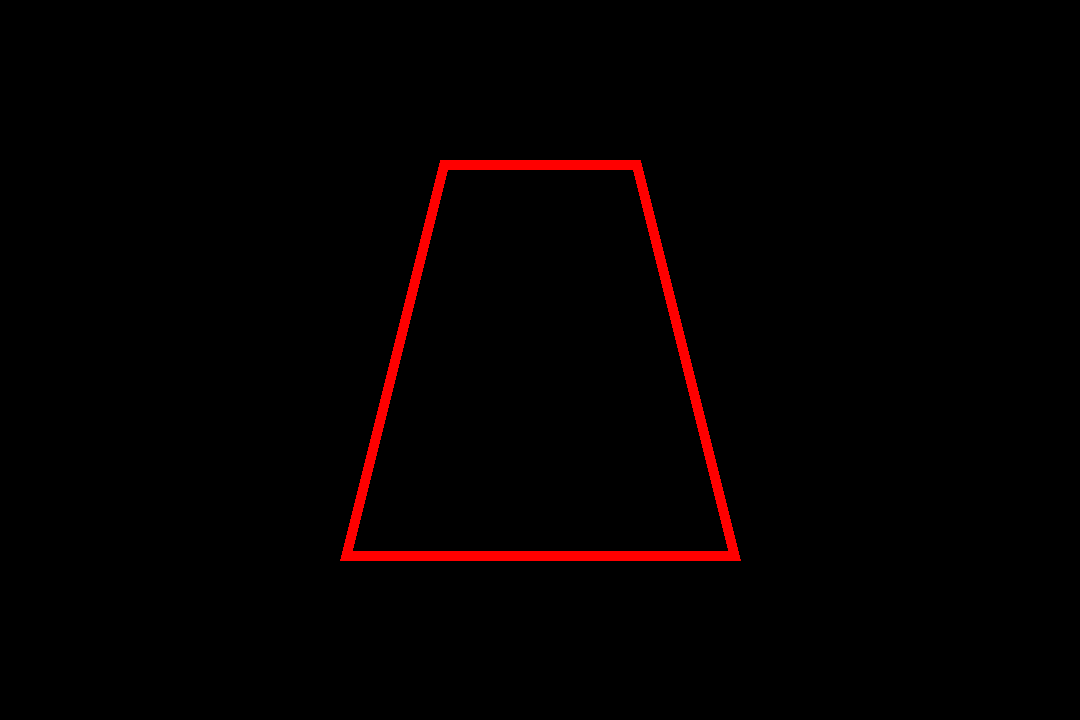

In [3]:

SOURCE_POINTS = [
    (WIDTH//2 + (100), HEIGHT//2 - (200)),
    (WIDTH//2 - (100), HEIGHT//2 - (200)),
    (WIDTH//2 - (200), HEIGHT//2 + (200)),
    (WIDTH//2 + (200), HEIGHT//2 + (200)),
]

document_representation(
    filepath="source.png",
    points=SOURCE_POINTS,
    color="red"
)


### Undistorted Image

The second image, `target.png`, is an estimated version of the first image if it were taken at a complete birds-eye view such that the vectors are in canonical bases.


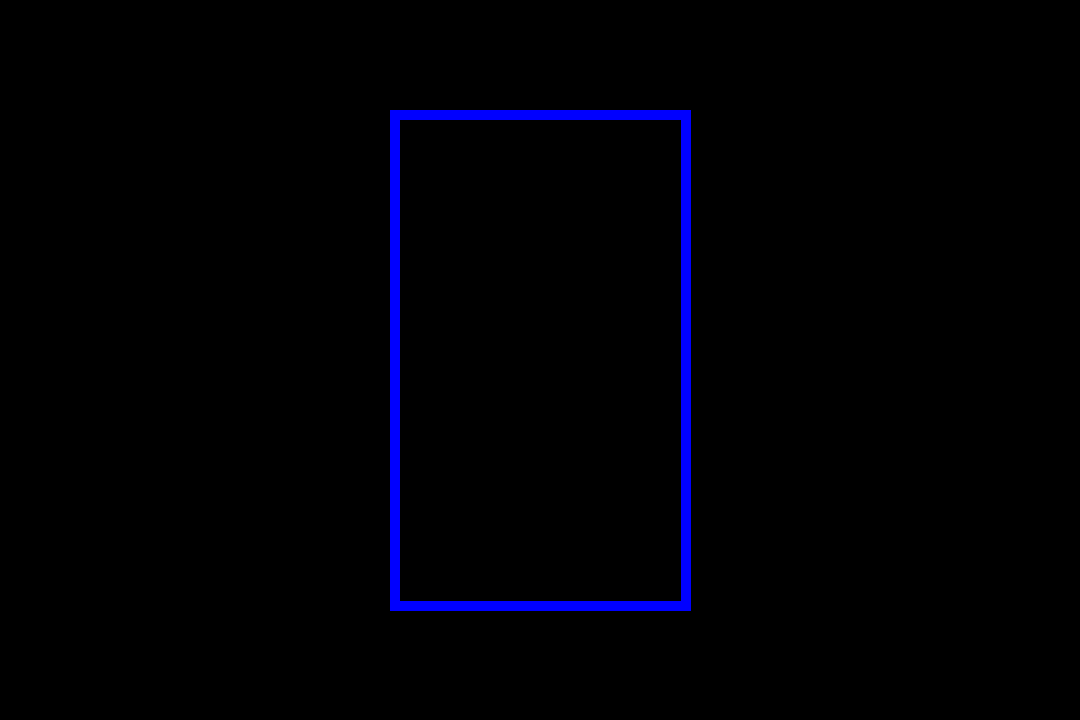

In [4]:

WIDTH, HEIGHT = (1080, 720)
TARGET_POINTS = [
    (WIDTH//2 + (150), HEIGHT//2 - (250)),
    (WIDTH//2 - (150), HEIGHT//2 - (250)),
    (WIDTH//2 - (150), HEIGHT//2 + (250)),
    (WIDTH//2 + (150), HEIGHT//2 + (250)),
]

document_representation(
    filepath="target.png",
    points=TARGET_POINTS,
    color="blue"
)


## Visual Inspection

Using the generated images, the homography is applied to the `source.png` to undistort it, and then reapplied to revert it to the original form. In a similar process, the `target.png` is distorted, then undistorted to obtain the original form.


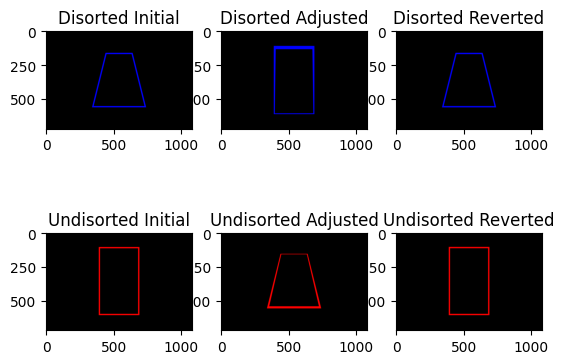

In [5]:
from cv2 import imread, warpPerspective
from matplotlib import pyplot

undistort = homography_matrix(SOURCE_POINTS, TARGET_POINTS)
distort = homography_matrix(TARGET_POINTS, SOURCE_POINTS)

source = imread("source.png")

source_to_target = warpPerspective(
    source.copy(), undistort, (WIDTH, HEIGHT)
)

target_to_source = warpPerspective(
    source_to_target.copy(), distort, (WIDTH, HEIGHT)
)

target = imread("target.png")

pyplot.subplot(2, 3, 1)
pyplot.imshow(source)
pyplot.title("Disorted Initial")

pyplot.subplot(2, 3, 2)
pyplot.imshow(source_to_target)
pyplot.title("Disorted Adjusted")

pyplot.subplot(2, 3, 3)
pyplot.imshow(target_to_source)
pyplot.title("Disorted Reverted")

target_to_source = warpPerspective(
    target.copy(), distort, (WIDTH, HEIGHT)
)

source_to_target = warpPerspective(
    target_to_source.copy(), undistort, (WIDTH, HEIGHT)
)

pyplot.subplot(2, 3, 4)
pyplot.imshow(target)
pyplot.title("Undisorted Initial")

pyplot.subplot(2, 3, 5)
pyplot.imshow(target_to_source)
pyplot.title("Undisorted Adjusted")

pyplot.subplot(2, 3, 6)
pyplot.imshow(source_to_target)
pyplot.title("Undisorted Reverted")

pyplot.show()


## Application Implementation

After testing the homography matrix, a simple GUI application can be made using cv2 and tkinter for document scan correction.


### Undistorting Function `to_canonical_`

Given an assumed distorted capture of a rectangular document, the homography matrix can be applied to the corners of the document and transformed into coordinates with canonical basis. The correspondence of the points matter so to standardize the arrangement of the pointments, an artbitrary clockwise selection will be used, starting from the upper left.


In [6]:
from numpy import linalg, ndarray, array
import cv2


def arrange_upper_left_clockwise(points: list[tuple[int]]):
    """Arranges list of points (x, y) in the following arrangement:
    upper left -> upper right -> lower right -> lower left. Assumes the (x, y)
        coordinates follow same system as cv2 and PIL.

    Args:
        points (list[tuple[int]]): List of tuples (x, y)
    """

    # Lowest  distance from origin is upper-leftmost  point
    # Highest distance from origin is lower-rightmost point
    distance_sorted_points = sorted(points, key=sum)
    upper_left, lower_right = distance_sorted_points[::3]

    # If remaining points, upper right is point with highest value of x
    lower_left, upper_right = [point for point in sorted(points)
                               if point not in {upper_left, lower_right}]

    # Clockwise arrangement, starting at upper left point
    return [upper_left, upper_right, lower_right, lower_left]


def to_canonical(source: ndarray, source_points: list[tuple[int]]) -> ndarray:
    """Function to convert an image in non canonical basis to canonical basis
        via projective linear transformation

    Args:
            source (ndarray): image loaded using cv2.imread()
            source_points (list[tuple[int]]): list of 4 tuples (x,y)
                        corresponding to points in the source image

    Returns:
            ndarray: image in rectangular form or in canonical basis
    """

    # Set source points to clockwise arrangement, starting upper left
    source_points = arrange_upper_left_clockwise(source_points)

    upper_left, upper_right, lower_right, lower_left = source_points
    left = (upper_left[0] + lower_left[0]) // 2
    right = (upper_right[0] + lower_right[0]) // 2

    top = (upper_left[1] + upper_right[1]) // 2
    bottom = (lower_left[1] + lower_right[1]) // 2

    # Set target points to clockwise arrangement, starting upper left
    target_points = [(left, top), (right, top),
                     (right, bottom), (left, bottom)]

    # Apply the homography matrix for undistortion and crop to size
    undistort = homography_matrix(source_points, target_points)
    target = cv2.warpPerspective(source.copy(), undistort, source.shape[1::-1])

    return target[top:bottom, left:right]


### Final Application

The `cv2` library has an event manager for mouse clicks which can be used for getting four points from the user. These four points represent the corners of the document in an (assumed) distorted image. Below is a GUI implementation using `cv2` that opens a source file path and allows the user to press four points. After the fourth clock, a new window displays the image that's undistorted using the `to_canonical` function. The points can be reset by clicking on the main window. Closing the main window saves the latest undistorted image to the given save filepath.


In [7]:
"""
GUI Application with CV2 Library. Allows the user to load an image from a file path, select four points on the image, display a perspective transform of the image to canonical bases, and finally save the image to a file path.
"""

import cv2
import numpy as np
from os.path import isfile


def record_point(event, x_value: int, y_value: int, _, marked_points: list):
    """
    Records mouse clicks in the markers list. Not meant to be called outside event triggers.

    Args:
            event: event information (not used)
            x_value (int): horizontal-position of the mouse click
            y_value (int): vertical-position   of the mouse click
            _: flags for the event (not used)
            marked_points: currently recorded marks from mouse clicks
    """

    if event == cv2.EVENT_LBUTTONDOWN:
        marked_points.append((x_value, y_value))


def get_file_locations() -> tuple[str]:
    """
    Obtains the file load location of the image to undistort
    and the file save location of the undistorted file from command-line arguments. If arguments are invalid, continually prompt user for input.

    Returns:
        tuple[str]: the input_path and output_path from cli in a tuple
    """
    input_path = "source.png"
    output_path = "target.png"

    while not isfile(input_path):
        input_path = input("Invalid load filepath. Input image file path: ")

    while not isfile(output_path):
        output_path = input("Invalid load filepath. Input image file path: ")

    return input_path, output_path


def main() -> None:
    """Main function"""

    # Window Settings
    SOURCE_WINDOW = "Source Image"
    TARGET_WINDOW = "Target Image"

    # Point markers for corners of the document in the distorted image
    image_corners = []
    MARKER_COLOR_GREEN = (0, 255, 0)

    input_path, output_path = get_file_locations()
    cv2.namedWindow(SOURCE_WINDOW, cv2.WINDOW_KEEPRATIO)
    source = cv2.imread(input_path)
    cv2.imshow(SOURCE_WINDOW, source)

    # The cv2.imread() of the input_path image and output_path image
    source, target = None, None

    try:
        # Continually run while SOURCE_WINDOW isn't closed
        while cv2.getWindowProperty(SOURCE_WINDOW, 0) >= 0:

            # SOURCE WINDOW Settings
            if len(image_corners) == 0:
                source = cv2.imread(input_path)

            for point in image_corners:
                cv2.circle(img=source, center=point, radius=3,
                           color=MARKER_COLOR_GREEN, thickness=cv2.FILLED)

            cv2.imshow(SOURCE_WINDOW, source)

            # TARGET WINDOW Settings
            if len(image_corners) == 4:
                # Add polygon marker for document area
                corners = arrange_upper_left_clockwise(image_corners)
                corners = [np.array(corners).reshape(-1,1,2)]
                cv2.polylines(source, corners, True, MARKER_COLOR_GREEN)
                
                target = to_canonical(cv2.imread(input_path), image_corners)
                cv2.namedWindow(TARGET_WINDOW, cv2.WINDOW_KEEPRATIO)
                cv2.imshow(TARGET_WINDOW, target)
            elif len(image_corners) == 5:
                image_corners.clear()
                cv2.destroyWindow(TARGET_WINDOW)

            # Mouse callback for recording points of mouse click
            cv2.setMouseCallback(SOURCE_WINDOW, record_point, image_corners)
            cv2.waitKey(1)

    except cv2.error:
        cv2.imwrite(output_path, target)


if __name__ == '__main__':
    main()


## References

1. R. Atienza, Foundations of Machine Learning, GitHub repository. GitHub, 2020. [Online]. Available: https://github.com/roatienza/ml
2. M. P. Deisenroth, A. A. Faisal, and C. S. Ong, Mathematics for Machine Learning, 1st ed. Cambridge University Press, 2021. [Online]. Available: https://mml-book.github.io/
3. “Numpy Linear Algebra Singular Value Decomposition — NumPy v1.23 Manual.” https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html (accessed Oct. 25, 2022).
4. Michael Langer, “lecture19 - Homographies SVD.” Nov. 05, 2008. Accessed: Oct. 25, 2022. [Online]. Available: http://www.cim.mcgill.ca/%7Elanger/558/2009/lecture19.pdf
5. David Kriegman, “Homography Estimation,” CSE252A: Computer Vision I, 2007. https://cseweb.ucsd.edu/classes/wi07/cse252a/homography_estimation/homography_estimation.pdf (accessed Oct. 25, 2022).
